# Basic Visualization and Preprocessing

In [28]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False


zip_path = tf.keras.utils.get_file(fname='data.txt')
csv_path, _ = os.path.splitext(zip_path)


Start by sub-sampling the data from 10-minute intervals to one-hour intervals:

In [42]:
df = pd.read_csv('data.csv', sep="\\s+") # pd.read_csv(csv_path) wasn't working for some reason
# Slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6] # Why would we do this?

df.index = pd.to_datetime(df['Timestamp'], format="%Y-%m-%d:%H:%M:%S.%f")

df.drop(["Timestamp", "Source"], axis=1, inplace=True)

In [34]:
df.head()

,Bt_med,Bt_min,Bt_max,Bx_med,Bx_min,Bx_max,By_med,By_min,By_max,Bz_med,...,Theta_max,Dens_med,Dens_min,Dens_max,Speed_med,Speed_min,Speed_max,Temp_med,Temp_min,Temp_max
Timestamp,,,,,,,,,,,,,,,,,,,,,
2025-03-13 00:00:00,7.21,7.03,7.26,2.60,1.66,3.09,-0.74,-2.51,0.94,-6.64,...,-56.57,0.18,0.11,0.26,555.24,547.02,561.65,136135,121117,153154
2025-03-13 00:05:00,6.98,6.95,7.03,2.03,0.53,2.41,-0.43,-0.83,-0.30,-6.68,...,-69.39,0.16,0.10,0.39,558.27,551.99,567.91,127127,92475,195859
2025-03-13 00:10:00,6.64,6.26,6.82,3.81,2.98,4.89,-0.55,-1.09,-0.21,-5.37,...,-42.48,0.11,0.10,0.19,536.44,520.12,553.48,118924,85942,154367
2025-03-13 00:15:00,6.27,5.25,6.51,3.85,2.89,4.99,-3.39,-3.59,0.28,-2.40,...,-16.41,0.10,0.10,0.23,548.70,533.30,553.31,176311,92195,243251
2025-03-13 00:20:00,6.55,6.50,6.73,5.86,5.55,6.63,-2.40,-3.07,-1.03,1.04,...,23.18,0.10,0.10,0.10,534.14,499.73,539.49,246684,60255,269295


In [43]:
for col in df.columns:
    df[col].replace(to_replace=-99999.00, value=float("nan"), inplace=True)

/tmp/ipykernel_56530/721162914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(to_replace=-99999.00, value=float("nan"), inplace=True)


In [44]:
for col in df.columns:
    df[col] = df[col].interpolate(method='linear')

In [45]:
df.describe().transpose()
#df[df['Bt_min'] < -9999]

,count,mean,std,min,25%,50%,75%,max
Bt_med,1941.0,6.417362,1.851111,2.94,4.96,6.25,7.25,12.84
Bt_min,1941.0,6.155948,1.901632,1.65,4.78,5.83,7.03,12.82
Bt_max,1941.0,6.573691,1.833456,3.63,5.09,6.47,7.41,12.93
Bx_med,1941.0,2.993053,2.501221,-4.27,1.33,3.14,4.58,9.95
Bx_min,1941.0,2.280536,2.679856,-8.51,0.41,2.35,4.08,9.70
Bx_max,1941.0,3.642483,2.351824,-3.50,2.24,3.75,5.03,10.61
By_med,1941.0,-2.641790,2.655928,-9.53,-4.52,-2.99,-0.84,6.17
By_min,1941.0,-3.463496,2.435001,-9.74,-5.13,-3.68,-1.99,5.54
By_max,1941.0,-1.706940,2.850805,-8.67,-3.64,-2.07,0.25,7.30
Bz_med,1941.0,-1.734034,3.331330,-10.65,-4.33,-1.80,0.76,7.30


In [41]:
df.head()

,Bt_med,Bt_min,Bt_max,Bx_med,Bx_min,Bx_max,By_med,By_min,By_max,Bz_med,...,Theta_max,Dens_med,Dens_min,Dens_max,Speed_med,Speed_min,Speed_max,Temp_med,Temp_min,Temp_max
Timestamp,,,,,,,,,,,,,,,,,,,,,
2025-03-13 00:00:00,7.21,7.03,7.26,2.6,1.66,3.09,-0.74,-2.51,0.94,-6.64,...,-56.57,0.18,0.11,0.26,555.24,547.02,561.65,136135,121117,153154
2025-03-13 00:05:00,6.98,6.95,7.03,2.03,0.53,2.41,-0.43,-0.83,-0.3,-6.68,...,-69.39,0.16,0.1,0.39,558.27,551.99,567.91,127127,92475,195859
2025-03-13 00:10:00,6.64,6.26,6.82,3.81,2.98,4.89,-0.55,-1.09,-0.21,-5.37,...,-42.48,0.11,0.1,0.19,536.44,520.12,553.48,118924,85942,154367
2025-03-13 00:15:00,6.27,5.25,6.51,3.85,2.89,4.99,-3.39,-3.59,0.28,-2.4,...,-16.41,0.1,0.1,0.23,548.7,533.3,553.31,176311,92195,243251
2025-03-13 00:20:00,6.55,6.5,6.73,5.86,5.55,6.63,-2.4,-3.07,-1.03,1.04,...,23.18,0.1,0.1,0.1,534.14,499.73,539.49,246684,60255,269295


Here's a basic view of three variables: Temperature in Celsius, Pressure in millibars, and density in g/m**3

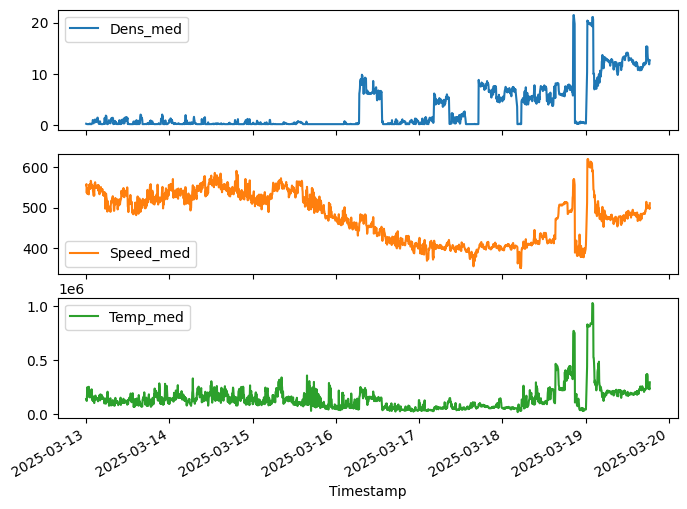

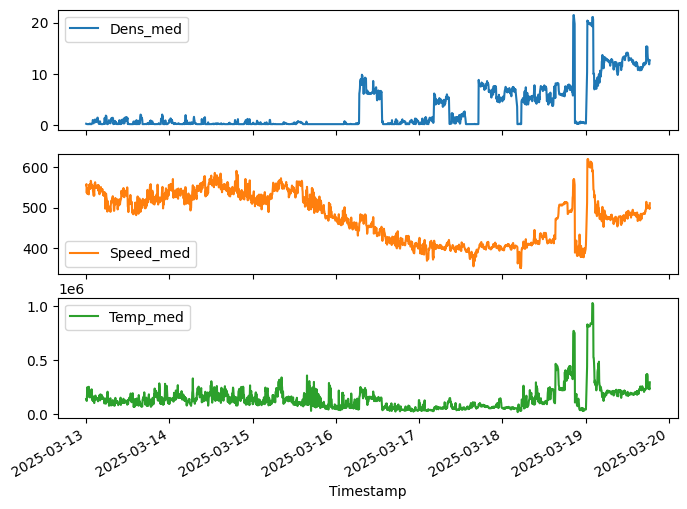

In [49]:
plot_cols = ['Dens_med', 'Speed_med', 'Temp_med']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

Next, look at the statistics of the dataset and see what you can infer:

In [52]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bt_med,1941.0,6.417362,1.851111,2.94,4.96,6.25,7.25,12.84
Bt_min,1941.0,6.155948,1.901632,1.65,4.78,5.83,7.03,12.82
Bt_max,1941.0,6.573691,1.833456,3.63,5.09,6.47,7.41,12.93
Bx_med,1941.0,2.993053,2.501221,-4.27,1.33,3.14,4.58,9.95
Bx_min,1941.0,2.280536,2.679856,-8.51,0.41,2.35,4.08,9.70
Bx_max,1941.0,3.642483,2.351824,-3.50,2.24,3.75,5.03,10.61
By_med,1941.0,-2.641790,2.655928,-9.53,-4.52,-2.99,-0.84,6.17
By_min,1941.0,-3.463496,2.435001,-9.74,-5.13,-3.68,-1.99,5.54
By_max,1941.0,-1.706940,2.850805,-8.67,-3.64,-2.07,0.25,7.30
Bz_med,1941.0,-1.734034,3.331330,-10.65,-4.33,-1.80,0.76,7.30


# Feature Engineering

You must understand your data to be sure that you're passing the model appropriately-formatted data.

This should be much easier for the model to interpret:

# Split the data


70-20-10 Training, validation, test sets.

In [51]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.9)] # 70
val_df = df[int(n*0.7):int(n*0.9)]  # 20
test_df = df[int(n*0.9):] # 10

num_features = df.shape[1]
num_features

27

In [102]:
train_df

,Bt_med,Bt_min,Bt_max,Bx_med,Bx_min,Bx_max,By_med,By_min,By_max,Bz_med,...,Theta_max,Dens_med,Dens_min,Dens_max,Speed_med,Speed_min,Speed_max,Temp_med,Temp_min,Temp_max
Timestamp,,,,,,,,,,,,,,,,,,,,,
2025-03-13 00:00:00,0.523529,0.554997,0.471112,-0.137254,-0.216375,-0.209769,0.733048,0.387378,0.950895,-1.562195,...,-1.460225,-0.557069,-0.544837,-0.574451,1.229022,1.260224,1.119190,0.047175,0.159456,-0.123062
2025-03-13 00:05:00,0.393506,0.510881,0.339945,-0.367047,-0.642142,-0.501063,0.852500,1.093536,0.508841,-1.574638,...,-1.832380,-0.562811,-0.547920,-0.540908,1.277256,1.341362,1.213713,-0.030914,-0.111111,0.209846
2025-03-13 00:10:00,0.201299,0.130374,0.220184,0.350554,0.280981,0.561306,0.806261,0.984250,0.540926,-1.167129,...,-1.051202,-0.577166,-0.547920,-0.592512,0.929746,0.821061,0.995826,-0.102025,-0.172825,-0.113606
2025-03-13 00:15:00,-0.007868,-0.426598,0.043394,0.366680,0.247070,0.604143,-0.288073,-0.066580,0.715608,-0.243234,...,-0.294409,-0.580036,-0.547920,-0.582191,1.124912,1.036234,0.993259,0.395456,-0.113756,0.579291
2025-03-13 00:20:00,0.150421,0.262724,0.168858,1.177006,1.249318,1.306677,0.093402,0.151992,0.248599,0.826866,...,0.854861,-0.580036,-0.547920,-0.615734,0.893132,0.488180,0.784583,1.005511,-0.415477,0.782317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-19 01:55:00,3.372719,3.428095,3.328271,1.987331,2.017959,1.966374,-1.875627,-2.281730,-1.936717,-1.117357,...,-0.324018,5.434460,5.845288,4.807848,1.793507,1.943945,1.581992,7.761139,8.689514,6.748413
2025-03-19 02:00:00,3.367066,3.411551,3.316865,1.934922,1.942602,1.966374,-1.702229,-2.117801,-1.359195,-1.310224,...,-0.473229,5.431590,5.802132,4.825909,1.761669,1.596207,1.550283,7.796725,8.656536,6.778199
2025-03-19 02:05:00,3.429251,3.455667,3.396706,1.886545,1.829567,1.782173,-2.257103,-2.172444,-2.318168,-1.042699,...,-0.481647,5.445944,5.891526,4.805268,1.818977,1.976597,1.583502,7.749991,8.664594,6.725884


# Normalize the data


For simplicity, use simple average&mdash;should be done using a moving average.

In [53]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


Peek at the distribution of the features:

/tmp/ipykernel_56530/622527561.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


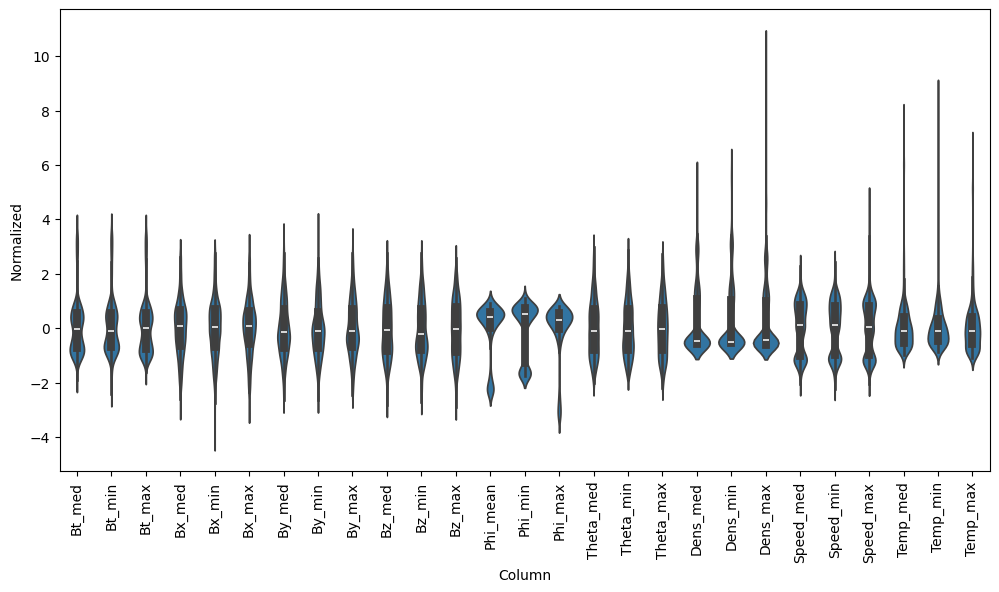

In [54]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Data Windowing

Make a set of predictions based on a window of consecutive samples from the data. Window the data so it can be reused in many models.

## 1. Indices & offsets

In [69]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        # Store the raw data:
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df 
         
        # Work out the label column indices:
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        # Work out the window parameters:
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}', 
            f'Label indices: {self.label_indices}', 
            f'Label column name(s) {self.label_columns}'
        ])

In [61]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['Dens_med'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s) ['Dens_med']

In [103]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns='Dens_med')
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s) Dens_med

## 2. Split

In [106]:
def split_window(self, features):
  inputs = features[:, :self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [117]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [118]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 27)
Inputs shape: (3, 6, 27)
Labels shape: (3, 1, 27)


In [101]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:(100+w2.total_window_size)]),
                           np.array(train_df[200:(200+w2.total_window_size)])])
example_window

<tf.Tensor: shape=(3, 7, 27), dtype=float64, numpy=
array([[[ 0.52352882,  0.55499722,  0.47111236, -0.13725355,
         -0.2163751 , -0.20976857,  0.73304812,  0.38737839,
          0.95089534, -1.5621953 , -1.45393634, -1.63444672,
          0.80393697, -1.74778441,  0.52342419, -1.50270059,
         -1.42101294, -1.46022471, -0.55706942, -0.54483708,
         -0.57445079,  1.22902163,  1.26022351,  1.11918964,
          0.04717549,  0.15945568, -0.12306162],
        [ 0.39350624,  0.51088056,  0.33994541, -0.36704736,
         -0.64214203, -0.50106325,  0.85250001,  1.0935363 ,
          0.50884104, -1.57463833, -1.43157324, -1.7813911 ,
          0.71589153,  0.68955059,  0.70993915, -1.62047867,
         -1.61809791, -1.83238017, -0.56281118, -0.54791962,
         -0.54090819,  1.27725596,  1.34136239,  1.21371309,
         -0.03091373, -0.11111102,  0.20984589],
        [ 0.20129896,  0.13037439,  0.22018429,  0.35055435,
          0.28098097,  0.56130556,  0.80626057,  0.984249

## Create `tf.data.Datasets`

In [ ]:

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


In [91]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x[2:7:2]

[3, 5, 7]